In [33]:
# -*- coding: utf-8 -*-
import logging
from pathlib import Path

import pandas as pd
import numpy as np

import cloudpickle
import click

import numpy as np

import matplotlib.pyplot as plt

In [34]:
models = '../models'

In [35]:
model_file = Path(models) / 'logistic_model.pkl'
with open(model_file, 'rb') as fp:
    fitted_model = cloudpickle.load(fp)

In [36]:
grid_results = fitted_model.cv_results_

In [37]:
AUC = grid_results['mean_test_AUC']

alpha


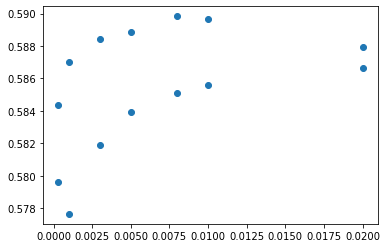

ValueError: could not convert string to float: 'l1'

In [38]:
param_dict = {}
for key, value in grid_results.items():
    if 'param_clf__' in key:
        name = key.replace('param_clf__', '')
        new = np.array(np.ma.getdata(grid_results[key]), dtype=np.float)
        param_dict[name] = new
        print(name)
        plt.figure()
        plt.scatter(new, AUC)
        plt.show()

param_dict

In [39]:
print("Best: %f using %s" % (fitted_model.best_score_, 
    fitted_model.best_params_))

Best: 0.589834 using {'clf__alpha': 0.008, 'clf__penalty': 'l1'}


In [40]:
fitted_model.cv_results_

{'mean_fit_time': array([101.85842166,  94.76014986,  98.18346443,  91.42650537,
        102.29652267,  92.53522949, 103.40879359,  90.24236698,
        106.25072112,  90.27896361, 102.52010465,  89.68255796,
        103.24732356,  59.16701679]),
 'std_fit_time': array([1.58873662, 3.41709916, 0.82168413, 2.95925867, 4.1377696 ,
        4.34557134, 2.4403464 , 1.64267398, 2.25404537, 2.24356271,
        1.04106742, 6.93468921, 7.88294291, 9.0602686 ]),
 'mean_score_time': array([2.06696339, 1.94363284, 1.69103398, 2.00128942, 2.3690402 ,
        2.24910917, 2.25715303, 2.32142096, 2.06055026, 2.13335662,
        1.97589169, 2.3194984 , 1.90839167, 0.81604056]),
 'std_score_time': array([0.20686432, 0.23871124, 0.2228598 , 0.23078218, 0.28910053,
        0.11671743, 0.15198907, 0.22512214, 0.1707666 , 0.4421331 ,
        0.13149405, 0.33035956, 0.17386315, 0.32283292]),
 'param_clf__alpha': masked_array(data=[0.0003, 0.0003, 0.001, 0.001, 0.003, 0.003, 0.005,
                    0.005, 

In [31]:
learning_rates = np.ma.getdata(grid_results['param_clf__learning_rate'])
learning_rates = np.ma.getdata(grid_results['param_clf__learning_rate'])
# alphas = np.ma.getdata(grid_results['param_clf__alpha'])
# rates = np.ma.getdata(grid_results['param_clf__optimizer__learning_rate'])
# dims = np.ma.getdata(grid_results['param_clf__hidden_layer_dim'])
# b_size = np.ma.getdata(grid_results['param_clf__batch_size'])
# opts = np.ma.getdata(grid_results['param_clf__optimizer'])

In [32]:
log_rates =np.log(rates)

NameError: name 'rates' is not defined

In [33]:
df = pd.DataFrame(np.stack((log_rates, dims, AUC), axis=-1))

NameError: name 'log_rates' is not defined

In [34]:
df.columns = ['log_rates', 'dims', 'auc']

NameError: name 'df' is not defined

NameError: name 'df' is not defined

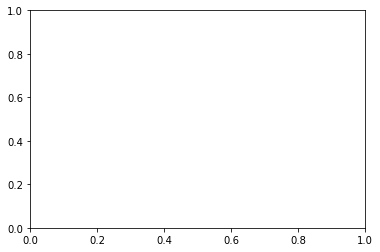

In [35]:
fig, ax2 = plt.subplots(1,1);
df.groupby('dims').plot('log_rates', 'auc', ax=ax2)
plt.legend([v[0] for v in df.groupby('dims')['dims']])

In [36]:
alphas = np.array(alphas, dtype=np.float)
log_alphas =np.log(alphas)
plt.scatter(log_alphas, AUC)

NameError: name 'alphas' is not defined

In [37]:
plt.scatter(log_rates, AUC)

NameError: name 'log_rates' is not defined

In [38]:
plt.scatter(opts, AUC)

NameError: name 'opts' is not defined

Best: 0.497589 using {'clf__learning_rate': 0.01, 'clf__max_iter': 400}
